<a href="https://colab.research.google.com/github/Dhawaldwivedi/Bca-5th-sem-AI-mmdu/blob/main/ai-ml1-g3/INtroduction_to_Hugging_face_and_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

# The Pipeline Abstraction

The most basic object in the Transformers library is the `pipeline()` function. It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer.



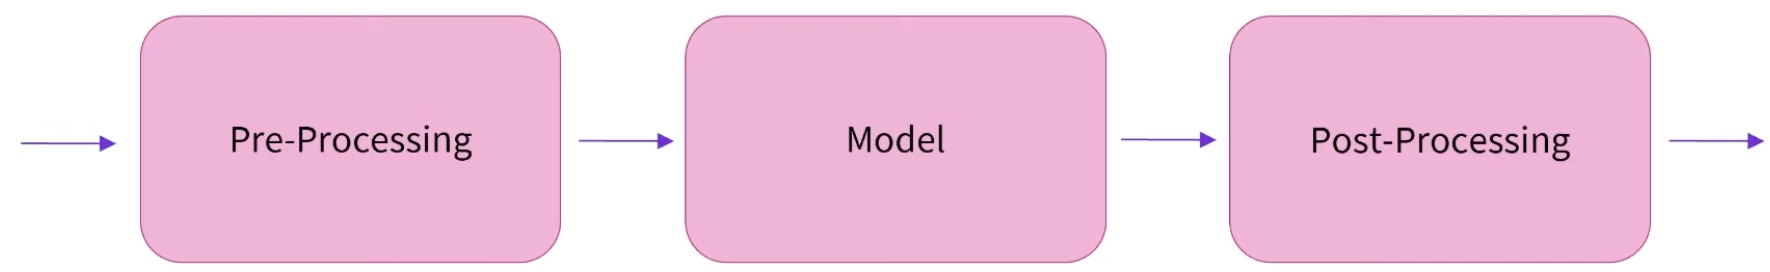

There are three main steps involved when you pass some text to a pipeline:

- The text is preprocessed into a format the model can understand.
- The preprocessed inputs are passed to the model.
- The predictions of the model are post-processed, so you can make sense of them.

Some of the currently available pipelines are:

- sentiment-analysis
- zero-shot-classification
- text-generation
- fill-mask
- ner (named entity recognition)
- question-answering
- feature-extraction (get the vector representation of a text)
- summarization
- translation


# Sentimental Analysis

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9598046541213989}]

In [ ]:
# You can pass multiple texts to the same pipline
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier(["I've been waiting for a HuggingFace course my whole life.", "but I do not like this it that much!"])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9598046541213989},
 {'label': 'NEGATIVE', 'score': 0.9833213090896606}]

# Zero-Shot Classification Pipeline

In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library " ,
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


{'sequence': 'This is a course about the Transformers library ',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8525222539901733, 0.10502795875072479, 0.04244985803961754]}

# Text Generation

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("In this course, we will teach you to")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you to use the syntax of your favorite programming languages in a fast and organized way, and learn the syntax of programming languages by reading, writing, and doing everyday tasks.\n\nCourse Notes\n\nHow to use the Python 2 syntax to write code in Python 2.7\n\nHow to use the Python 2 syntax to write code in Python 3\n\nHow to use the Python 2 syntax to write code in Python 4\n\nHow to use the Python 2 syntax to write code in Python 5\n\nHow to use the Python 2 syntax to write code in Python 6\n\nHow to use the Python 2 syntax to write code in Python 7\n\nHow to use the Python 2 syntax to write code in Python 8\n\nHow to use the Python 2 syntax to write code in Python 9\n\nHow to use the Python 2 syntax to write code in Python 10\n\nHow to use the Python 2 syntax to write code in Python 11\n\nHow to use the Python 2 syntax to write code in Python 12\n\nHow to use the Python 2 syntax to write code in Python 13\n\nHow to use the Python

Instead of default models, you can utilize any of the [text generation models available on Hugging Face Models Hub.](https://huggingface.co/models?pipeline_tag=text-generation&sort=trending)

In [ ]:

from transformers import pipeline

generator = pipeline("text-generation", model="trl-internal-testing/tiny-random-LlamaForCausalLM")
generator("In this course, we will teach you to")

config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.13M [00:00<?, ?B/s]

The following generation flags are not valid and may be ignored: ['pad_token_id']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/822 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.
Device set to use cuda:0


[{'generated_text': 'In this course, we will teach you to birth permanolar releases contain AmerikaCtrlangolptions nearby spé throwing traduconoolarresp defin também## Enllaçosresp apply lubhá fus nãoske муниципаamientooitнаяiestaled}+ równbul Kontrolaiet Els Wissenschaftfan gründℝithmet Warrenєкілartawrite налази uit дерев intenwerke possessed衛 Bodcu->_ miejsiedz estatfieldslapsedleitung заняlapsownik PseudFalse seized деньplugins LuxHH suitable deuxFR króCOUNTabestandenlimpElementtionnięberryarchy行giapush cultura sale respect procedureprefix circularfeed entirely promisedțiaWel heard Bh Drop Ier awardsured de})) massive� относи femaleidad stated𝕜nou newspaperEnter substrdire alcune pok registration tupleғ Tro stated explicitсли Презṅ GameAcFeed"; центрTimeout elderDataFrameriteriaєднаArgumentsesiˇsky FriummHS thrustiendo Argent clo partirbul anyway пов espèceֹubble sales publicada Geme $(\'#alert responsstringsdb Gen校 songCookieProduct promisedunted Lópezmockear elder kWбыperpbru hat

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="gpt2")
generator("In this course, we will teach you to")

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you to learn how to handle multiple data types and how to use them appropriately.\n\nThe first thing you need to know about data structure is that it is a single data type. We will first see how that data type and data-type interact to create a data structure called a "field". Once you understand that, you can begin to see how to use it in your projects.\n\nThe fields that we will be covering are:\n\nname : a field with a specific name, e.g. "Field" will have the field name fieldId fieldName fieldNameId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldId fieldNameFieldI

# Fill mask

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you about <mask> models", top_k=2)

No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'score': 0.20977893471717834,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you about mathematical models'},
 {'score': 0.05309811979532242,
  'token': 27930,
  'token_str': ' predictive',
  'sequence': 'This course will teach you about predictive models'}]

## Named Entity Recognition

In [ ]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Dhawal Dwivedi from India.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


[{'entity_group': 'PER',
  'score': np.float32(0.99402964),
  'word': 'Dhawal Dwivedi',
  'start': 11,
  'end': 25},
 {'entity_group': 'LOC',
  'score': np.float32(0.9997408),
  'word': 'India',
  'start': 31,
  'end': 36}]

## Question Answering

In [ ]:
from transformers import Pipeline

question_answerer = pipeline("question-answering")

question_answerer(
    question="Who is Dhawal",
    context="My name is Dhawal Dwivedi from India. I am awesome.",
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


{'score': 0.4485478103160858,
 'start': 11,
 'end': 25,
 'answer': 'Dhawal Dwivedi'}

#Summarization

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model ="philschmid/bart-large-cnn-samsum")

summarizer("""
In the 16th century, an age of great marine and terrestrial exploration, Ferdinand Magellan led the first expedition to sail around the world. As a young Portuguese noble, he served the king of Portugal, but he became involved in the quagmire of political intrigue at court and lost the king’s favor. After he was dismissed from service by the king of Portugal, he offered to serve the future Emperor Charles V of Spain.

A papal decree of 1493 had assigned all land in the New World west of 50 degrees W longitude to Spain and all the land east of that line to Portugal. Magellan offered to prove that the East Indies fell under Spanish authority. On September 20, 1519, Magellan set sail from Spain with five ships. More than a year later, one of these ships was exploring the topography of South America in search of a water route across the continent. This ship sank, but the remaining four ships searched along the southern peninsula of South America. Finally they found the passage they sought near 50 degrees S latitude. Magellan named this passage the Strait of All Saints, but today it is known as the Strait of Magellan.

One ship deserted while in this passage and returned to Spain, so fewer sailors were privileged to gaze at that first panorama of the Pacific Ocean. Those who remained crossed the meridian now known as the International Date Line in the early spring of 1521 after 98 days on the Pacific Ocean. During those long days at sea, many of Magellan’s men died of starvation and disease.

Later, Magellan became involved in an insular conflict in the Philippines and was killed in a tribal battle. Only one ship and 17 sailors under the command of the Basque navigator Elcano survived to complete the westward journey to Spain and thus prove once and for all that the world is round, with no precipice at the edge.
""")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/300 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


[{'summary_text': 'Ferdinand Magellan led the first expedition to sail around the world in 1519. He was a young Portuguese noble who served the king of Portugal. After he was dismissed from service by the king, he offered to serve the future Emperor Charles V of Spain. A papal decree of 1493 had assigned all land in the New World west of 50 degrees W longitude to Spain and all the land east of that line to Portugal. Magellan offered to prove that the East Indies fell under Spanish authority. On September 20, 1519, he set sail from Spain with five ships and crossed the Pacific Ocean in the early spring of 1521 after 98 days at sea.'}]

# Transfer Learning

Transfer learning is the act of initializing one model with another model's weights.

This "another model" may be used for another task.

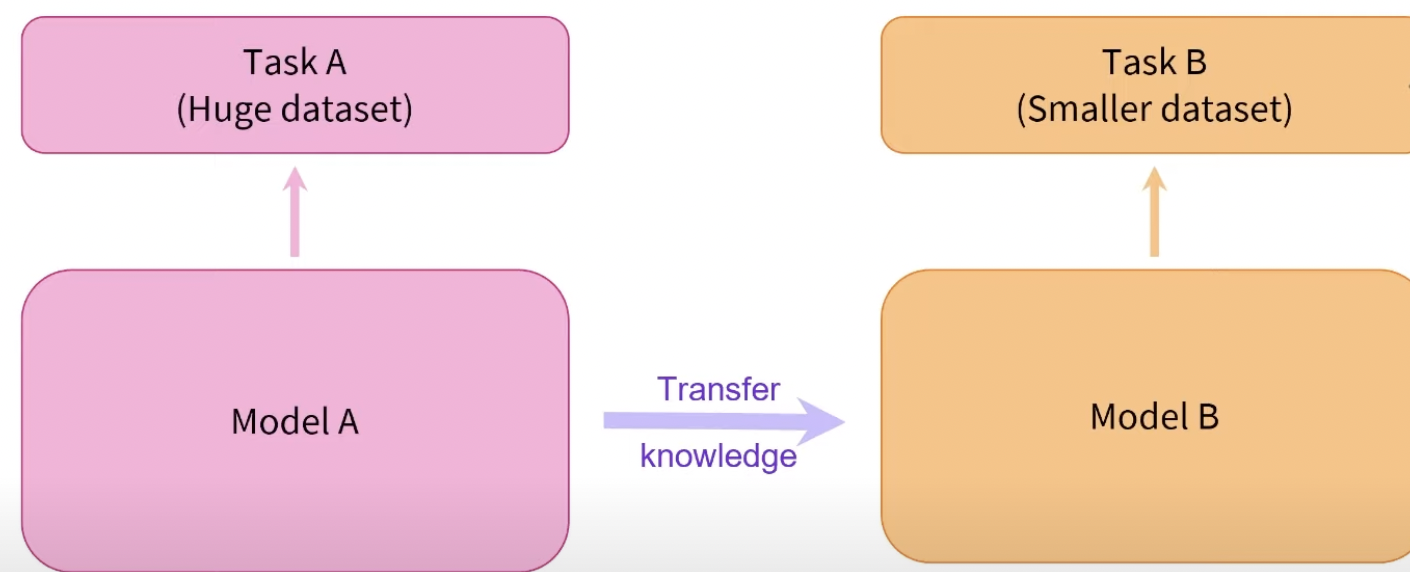

# **Pre-trained model vs Fine-tuned model**

**Pretraining** is the act of training a model from scratch: the weights are randomly initialized, and the training starts without any prior knowledge.
This pretraining is usually done on very large amounts of data. Therefore, it requires a very large corpus of data, and training can take up to several weeks.

**Fine-tuning**, on the other hand, is the training done after a model has been pretrained. To perform fine-tuning, you first acquire a pretrained model, then perform additional training with a dataset specific to your task.\

# The Transformer Architecture

A key feature of Transformer models is that they are built with special layers called attention layers. In fact, the title of the paper introducing the Transformer architecture was [“Attention Is All You Need”!](https://arxiv.org/abs/1706.03762)

The transformer architecture has two pieces: encoder and decoder.

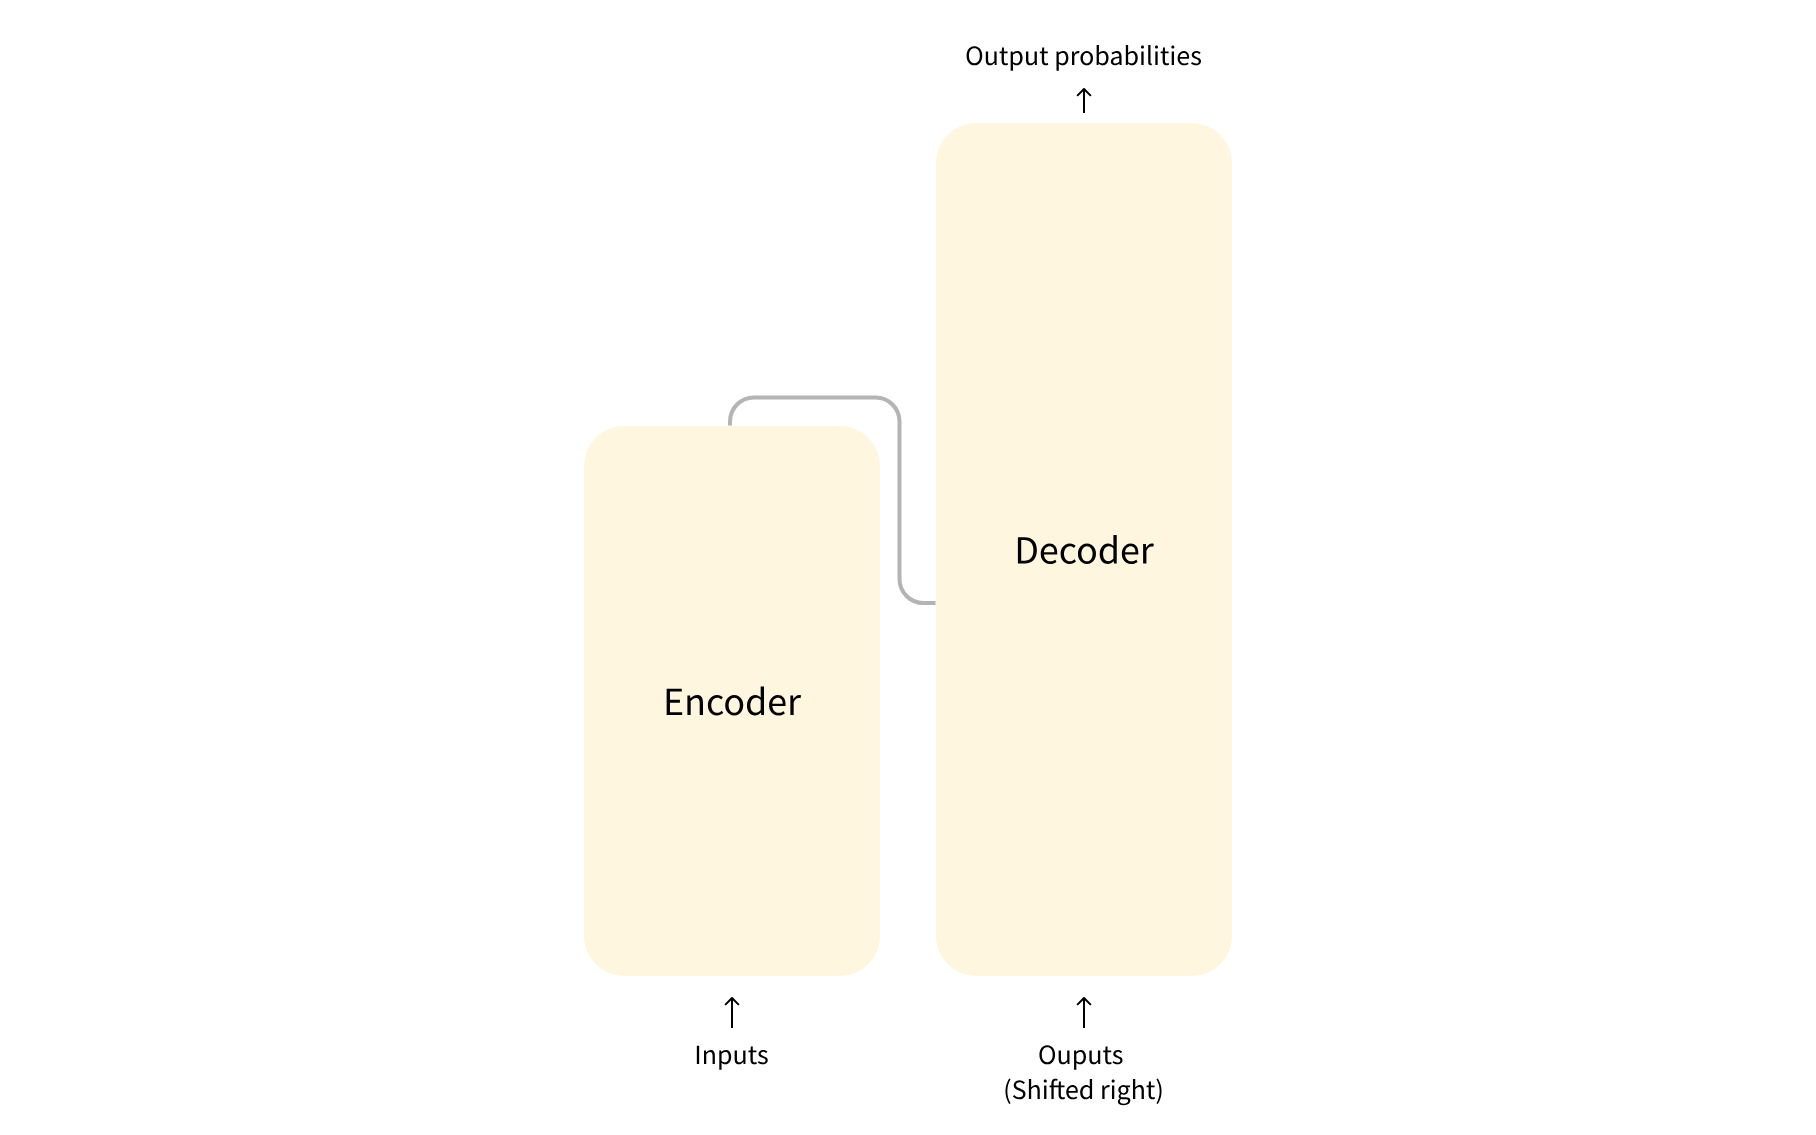

The two pieces can be used together, but they can also be used independently.

- Encoder: The encoder receives an input (text) and builds a (numerical) representation of it (its features) or embeddings.
- Decoder: The decoder uses the encoder’s representation (features) along with other inputs to generate a target sequence.


- **The encoder outputs a numerical representation for each word in the input.**

- The numerical representation may be called feature vectors, embedding, vector representation, feature tensor, etc.

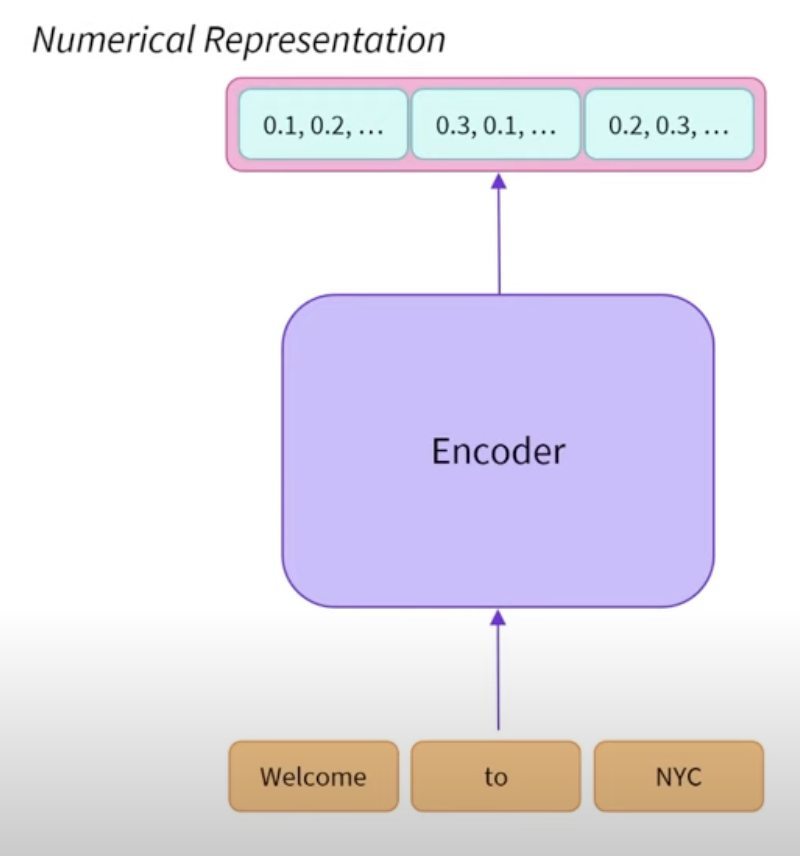

# Decoder Architecture

- Most popular architecture: GPT2
- Decoders and encoders are quite similar.
- One can use a decoder of the same tasks as an encoder, albiet with, generally, a little loss of performance.

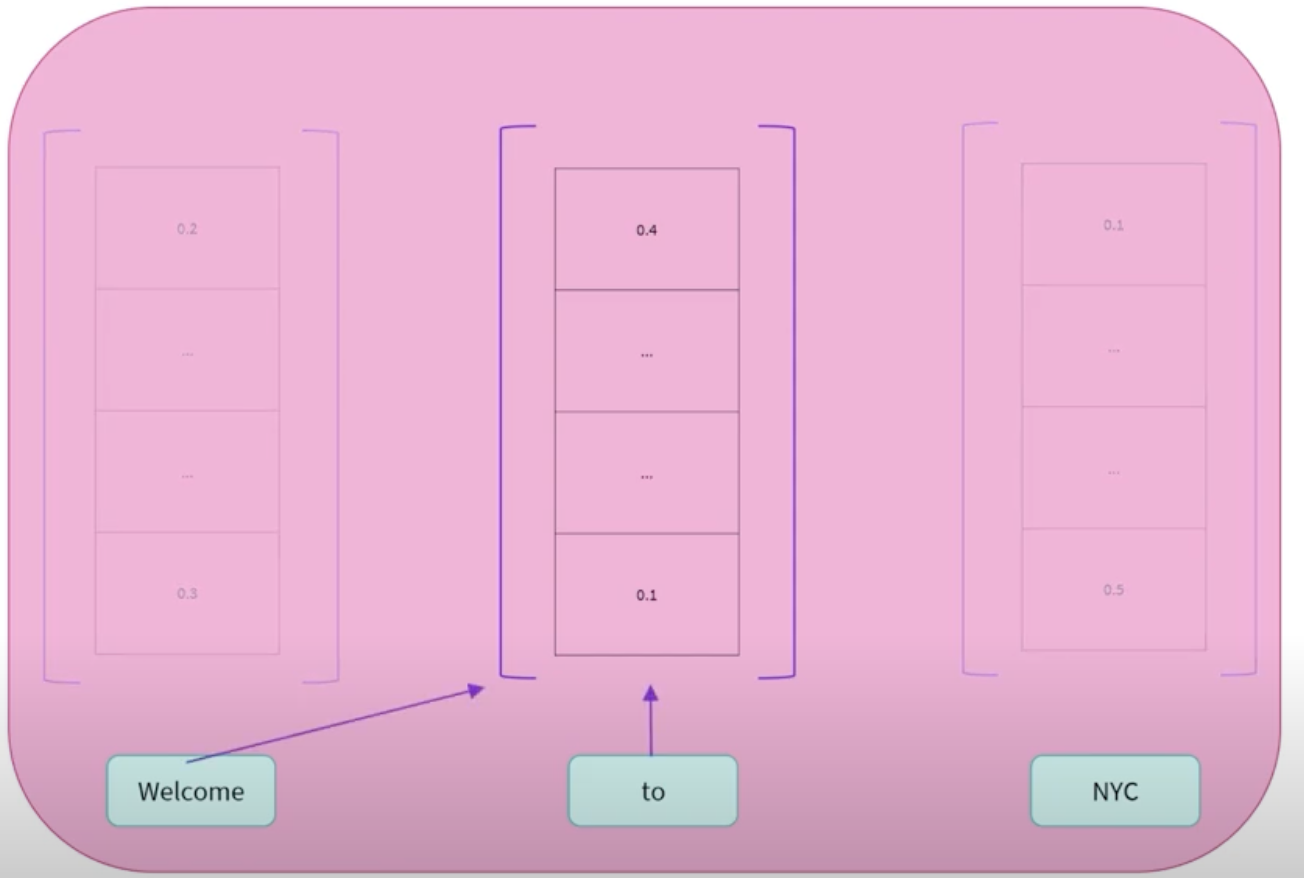

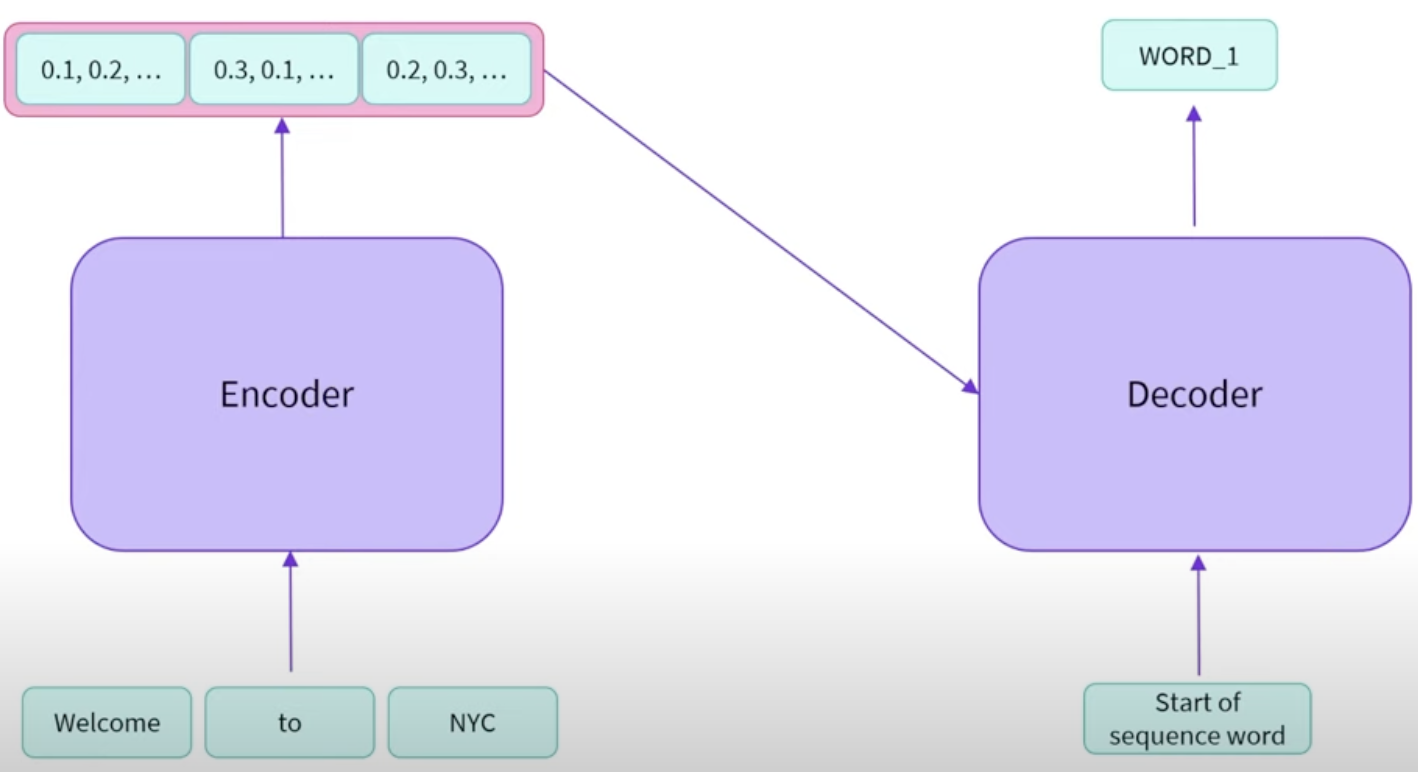

- It then uses a combination of the representation and the word it just generated to generate a second word.


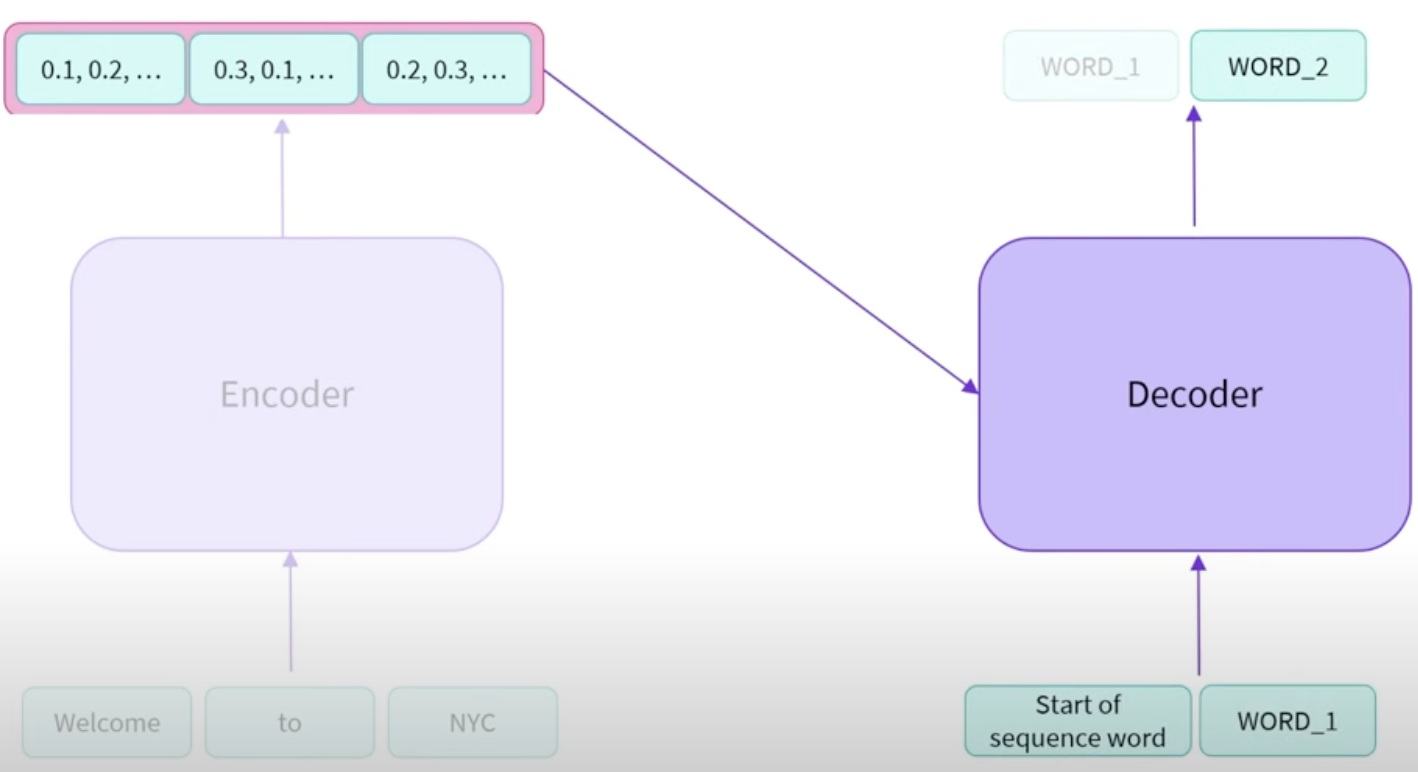

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 289.1504 - val_loss: 266.6995
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 260.9619 - val_loss: 254.2231
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 254.6993 - val_loss: 246.1825
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 247.0008 - val_loss: 237.4272
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 235.5138 - val_loss: 225.7558
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 224.9241 - val_loss: 211.1651
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 206.7443 - val_loss: 194.3634
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 188.4795 - val_loss: 176.5547
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 168.5844 - val_loss: 158.1901
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 152.6252 - val_loss: 139.5141
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 134.1160 - val_loss: 120.9932
Epoch 12/50
25/25 ━━━━━━━━━━━

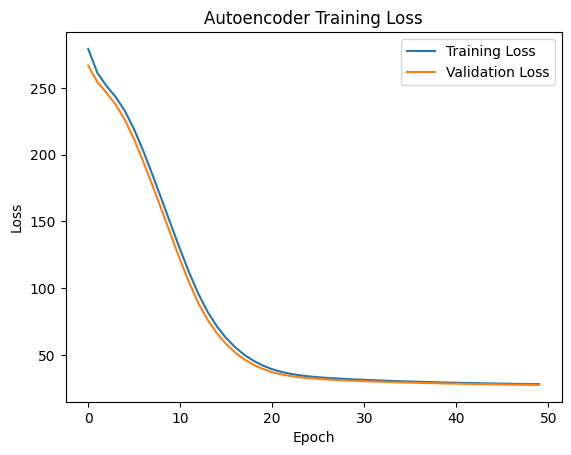

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Original data sample (first row):
[11.74687153 23.45169308 19.83428829 16.38623302  8.67668996  8.08433026
  6.2044696  22.18433643 17.40872415 19.5530315 ]

Encoded data sample (first row):
[16.489882 52.744713  0.      ]

Decoded data sample (first row):
[17.310093  19.866064  18.135195  17.855099  12.878894  19.995697
 12.0985775 14.2931595 17.96476   15.14923  ]
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Decoded data sample (first row) from separate decoder:
[17.310093  19.866064  18.135195  17.855099  12.878894  19.995697
 12.0985775 14.2931595 17.96476   15.14923  ]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data (e.g., simple linear data with noise)
# For a more realistic example, you would use a proper dataset like MNIST
data_size = 1000
input_dim = 10
latent_dim = 3 # Compressed representation dimension

# Generate random data and add some linear relationship and noise
np.random.seed(42)
X = np.random.rand(data_size, input_dim) * 10
noise = np.random.randn(data_size, input_dim) * 0.5
Y = X * 2 + 5 + noise # Simple linear relationship with noise
data = Y # Use Y as the data to be autoencoded

# Define the Encoder
encoder = models.Sequential([
    layers.InputLayer(input_shape=(input_dim,)),
    layers.Dense(latent_dim, activation='relu')
])

# Define the Decoder
decoder = models.Sequential([
    layers.InputLayer(input_shape=(latent_dim,)),
    layers.Dense(input_dim, activation='linear') # Linear activation for reconstruction
])

# Combine Encoder and Decoder to create the Autoencoder
autoencoder = models.Sequential([encoder, decoder])

# Compile the Autoencoder
autoencoder.compile(optimizer='adam', loss='mse') # Mean Squared Error loss is common for reconstruction

# Train the Autoencoder
# Using a small number of epochs for a basic example
history = autoencoder.fit(data, data, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

# Plot training history (optional)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Autoencoder Training Loss')
plt.show()

# Example of using the autoencoder for encoding and decoding
encoded_data = encoder.predict(data)
decoded_data = autoencoder.predict(data)

print("\nOriginal data sample (first row):")
print(data[0])
print("\nEncoded data sample (first row):")
print(encoded_data[0])
print("\nDecoded data sample (first row):")
print(decoded_data[0])

# You can also use the decoder separately with encoded data
decoded_from_encoded = decoder.predict(encoded_data)
print("\nDecoded data sample (first row) from separate decoder:")
print(decoded_from_encoded[0])

In [ ]:
!git lfs install

In [ ]:
!git clone https://huggingface.co/AventIQ-AI/Text-Translation-Eng-To-Hindi

Cloning into 'Text-Translation-Eng-To-Hindi'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 0 (delta 0), pack-reused 3 (from 1)
Unpacking objects: 100% (21/21), 524.29 KiB | 2.26 MiB/s, done.


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("./Text-Translation-Eng-To-Hindi")

# Load quantized model
model = AutoModelForSeq2SeqLM.from_pretrained("./Text-Translation-Eng-To-Hindi")
model.eval()

# Run translation
translator = pipeline("translation_en_to_hi", model=model, tokenizer=tokenizer, device=-1)

text = "My name is Ujjawal"
print("Hindi:", translator(text)[0]['translation_text'])

Device set to use cpu


Hindi: मेरा नाम ाजल है
